In [362]:
import sys
sys.path.insert(0, './python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import imp
imp.reload(model)
import random
from collections import defaultdict
import torch
import math

In [363]:
%matplotlib inline

In [365]:
import imp
import bp_nn
imp.reload(bp_nn)
l = bp_nn.myLayer(1,1,N, torch.from_numpy(J_interaction).float(), True)

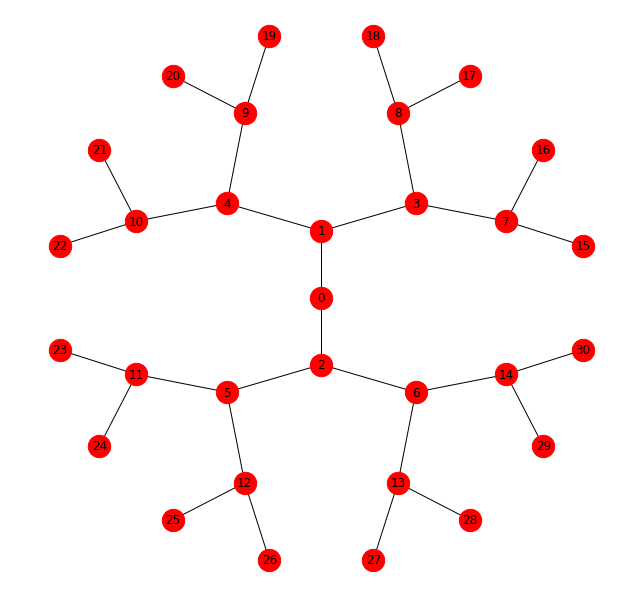

In [388]:
Degree = 3 # degree
Height = 4 # Height of the tree
N, J_interaction = graph_gen.tree_interaction(Degree,Height)
j = graph_gen.fixed_value(1)
J = graph_gen.set_J(J_interaction, j)
h = 0.0
H = np.full((N,), h)
tree = model.model(N, H, J, J_interaction)

In [391]:
import bp_nn
imp.reload(bp_nn)
net = bp_nn.bp_nn(1,1,N, tree, True)
result_tree = net.train()

Total number of trainable parameters: 992
 -1.113 0.000 -0.003 0.383 -0.730 -0.0
free_energy: -1.113,  std_fe: 0.000, mag_mean: -0.004, entropy: 0.376 energy: -0.737 weight: -0.00

# Grid

In [392]:
m = n = l = 3 # L of square grid

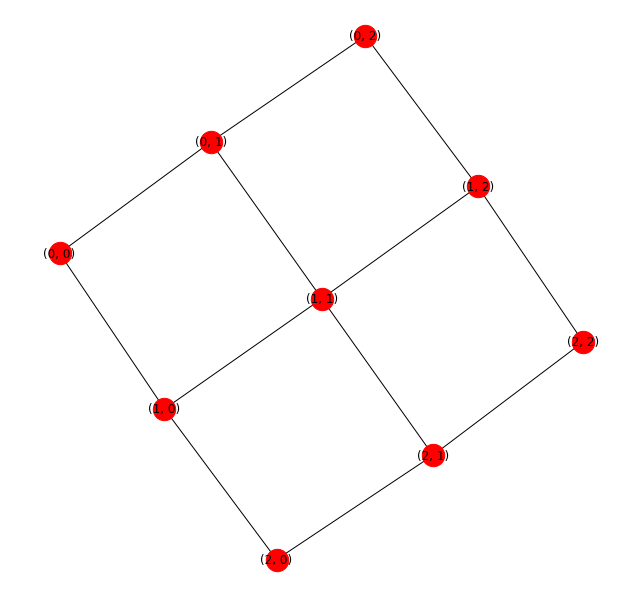

In [393]:
N, J_interaction = graph_gen.grid_2d_interaction(n,m)

In [394]:
j = graph_gen.fixed_value(1)
J = graph_gen.set_J(J_interaction, j)
h = 0.
H = np.full((N,), h)
beta = 1

In [400]:
grid_2d = model.model(N, H, J, J_interaction, beta)

In [401]:
import bp_nn
imp.reload(bp_nn)
net_grid = bp_nn.bp_nn(1,1,N, grid_2d, True)


Total number of trainable parameters: 90
 -1.420 0.010 -0.026 0.132 -1.288 0.0
free_energy: -1.420,  std_fe: 0.013, mag_mean: -0.023, entropy: 0.136 energy: -1.284 weight: 0.00

In [404]:
result_grid = net_grid.train(batch_size=100000, batch_mean = 100000)

Total number of trainable parameters: 90
 -1.420 0.010 -0.002 0.135 -1.285 0.0

KeyboardInterrupt: 